In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline

In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [59]:
#Load Training Data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


y = [1], it's a 'cat' picture.


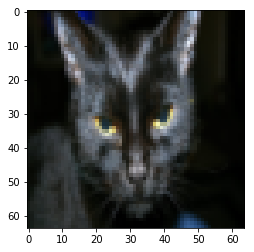

In [60]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])


print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [38]:
ooooooo

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

print ("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
#test_view = train_set_x_orig.view(12288, -1)
#print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))


sanity check after reshaping: [ 17 196  82   1   9]
train_set_x_orig shape: (209, 64, 64, 3)
train_set_x_flatten shape: (209, 12288)


In [65]:
#print ("sanity check after reshaping: " + str(train_set_x_orig[0:5,0]))
train_set_x_orig = train_set_x_orig/255
test_set_x_orig = test_set_x_orig/255
#print ("sanity check after reshaping: " + str(train_set_x_orig[0:5,0]))

#convert numpy arrays to torch tensors
pt_train_set_x = torch.from_numpy(train_set_x_orig).float()
pt_train_set_y = torch.from_numpy(train_set_y).float()
pt_test_set_x = torch.from_numpy(test_set_x_orig).float()
pt_test_set_y = torch.from_numpy(test_set_y).float()

pt_train_set_x = pt_train_set_x.reshape(209,3,64,64)
pt_test_set_x = pt_test_set_x.reshape (50,3,64,64)


print (train_set_x_orig.shape)
print (pt_train_set_x.shape)
print (train_set_y.shape)
print (pt_train_set_y.shape)
print (pt_train_set_x.type())

print (pt_test_set_x.shape)


(209, 64, 64, 3)
torch.Size([209, 3, 64, 64])
(1, 209)
torch.Size([1, 209])
torch.FloatTensor
torch.Size([50, 3, 64, 64])


In [66]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        #self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        #self.mp = nn.MaxPool2d(2)
        #self.fc = nn.Linear(3380, 1)
        self.fc = nn.Linear(12288, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        in_size = x.size(0)
        #print ("in_size = " + str (in_size))
        #x = F.relu(self.mp(self.conv1(x)))
        #x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        #print (x.shape)
        #print ("sanity check after reshaping: " + str(x[0:5,0]))
        
        return self.sigmoid(self.fc(x))
        
    
        #return F.log_softmax(x)
        #return self.sigmoid(self.l3(out2))

model = Net()

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [67]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


In [68]:
# Training loop

#Log some data
costs = []
train_acc = []
test_acc = []

#Train
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(pt_train_set_x)

    # Compute and print loss
    loss = criterion(y_pred, pt_train_set_y)

        
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    # Record Metrics
    if epoch % 10 == 0:
        print(epoch, loss.data[0])
        costs.append(loss.data[0])
        
        #Record Accuracy
        temp_acc_train = accuracy(pt_train_set_x, train_set_y)
        train_acc.append(temp_acc_train)
    
        temp_acc_test = accuracy(pt_test_set_x, test_set_y)
        test_acc.append(temp_acc_test)
        

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([1, 209])) that is different to the input size (torch.Size([209, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(0.6545)
10 tensor(1.8153)
20 tensor(2.9677)
30 tensor(1.9751)
40 tensor(0.6191)
50 tensor(2.7811)
60 tensor(1.9450)
70 tensor(0.6243)
80 tensor(0.4542)
90 tensor(0.4309)
100 tensor(2.4484)
110 tensor(0.4056)
120 tensor(2.3265)
130 tensor(0.9804)
140 tensor(0.4125)
150 tensor(0.4151)
160 tensor(0.4983)
170 tensor(1.7950)
180 tensor(0.7507)
190 tensor(1.9161)
200 tensor(0.6367)
210 tensor(1.7619)
220 tensor(0.7339)
230 tensor(1.6390)
240 tensor(0.8084)
250 tensor(1.4865)
260 tensor(0.9026)
270 tensor(1.3016)
280 tensor(0.9992)
290 tensor(1.1135)
300 tensor(1.0218)
310 tensor(1.0028)
320 tensor(0.9664)
330 tensor(0.9337)
340 tensor(0.9015)
350 tensor(0.8700)
360 tensor(0.8392)
370 tensor(0.8090)
380 tensor(0.7795)
390 tensor(0.7506)
400 tensor(0.7223)
410 tensor(0.6945)
420 tensor(0.6673)
430 tensor(0.6404)
440 tensor(0.6140)
450 tensor(0.5879)
460 tensor(0.5622)
470 tensor(0.5368)
480 tensor(0.5117)
490 tensor(0.4869)
500 tensor(0.4625)
510 tensor(0.4384)
520 tensor(0.4148)
530 

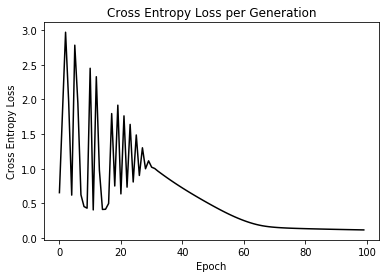

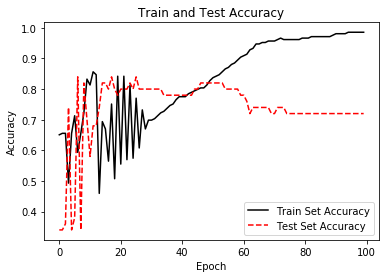

In [69]:
# Plots

# Plot loss over time# Plot  
plt.plot(costs, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Train and Test Set Predictions
print ("train set accuracy = " + str (accuracy(pt_train_set_x,train_set_y)))
print ("test set accuracy = " + str (accuracy(pt_test_set_x,test_set_y)))


train set accuracy = 0.9856459330143541
test set accuracy = 0.7


In [ ]:
print (prediction)

In [13]:
def accuracy(X, Y):
    """
    This function is used to measure accuracy of the model.
    
    Arguments:
    X -- data set of examples you would like to label
    Y -- labels
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    prediction = model(X)
    np_prediction = np.round(prediction.detach().numpy())
    predictions_correct = np.equal(np_prediction, Y.T)
    p = np.mean(predictions_correct)
        
    return p

In [ ]:
#Test Image 
#fname = "datasets/cat1.JPG"  #LR is good
#fname = "datasets/cat3.JPG"  #LR is bad
#fname = "datasets/cat4.JPG"  #LR is good
fname = "datasets/cartoon_grump.JPG"   #LR is bad
#fname = "datasets/puss.JPG"   #LR is bad
#fname = "datasets/meandog.JPG"  #LR is good
#fname = "datasets/puppy.JPG"  #LR is good
image = np.array(ndimage.imread(fname, flatten=False))
resized_image = scipy.misc.imresize(image, size=(64,64))
my_image = resized_image.reshape((1, 64*64*3))
pt_my_image = torch.from_numpy(my_image).float()


print ("The Algo says " + str(model(pt_my_image)))
plt.imshow(image)
plt.show()
plt.imshow(resized_image)

In [ ]:
for param in model.parameters():
  print(param.data)

In [ ]:
NEXT
1. need to double check shapes on this one